# Predicting sale price of houses

The aim of this project is to build a machine learning model to predict sale price of houses, based on multiple explanatory variables describing aspects of these houses.
The dataset used for this project is available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


# House price prediction : Data analysis

This notebook is the first step of our project which steps features :
- **1\.  Data analysis**
- 2\.  Feature engineering
- 3\.  Feature selection
- 4\.  Model building

In the following, we will analyse the variables of the dataset.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./House_Price/houseprice.csv')
print(data.shape)

data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The dataset contains 1460 rows (houses) and 81 columns (variables).

Let's take a look at the missing values

### missing values

In [3]:
list_var_na = [col for col in data.columns if data[col].isnull().sum() > 0]

print(data[list_var_na].isnull().mean()*100)

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


Some variables have an important percentage of missing values. We will take account of this later when we will do feature selection.

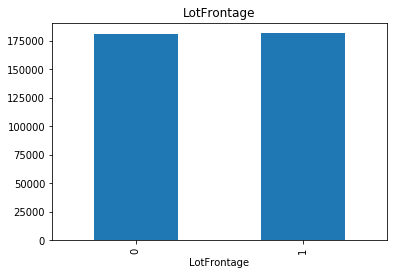

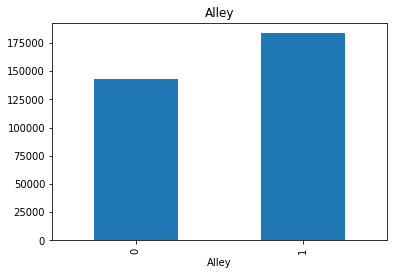

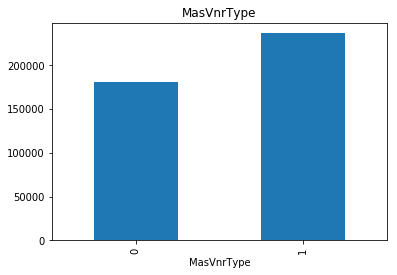

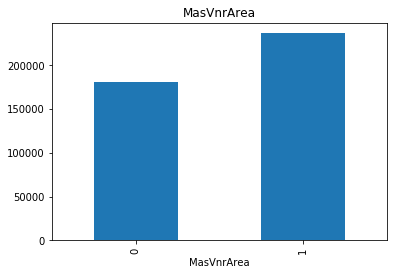

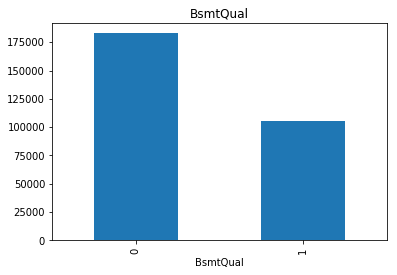

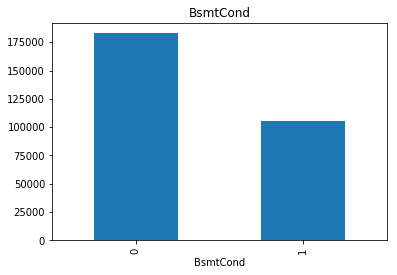

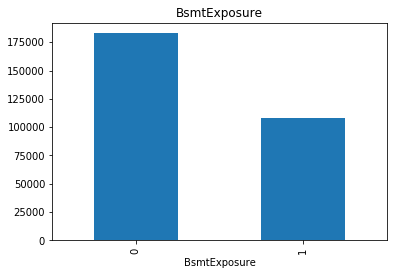

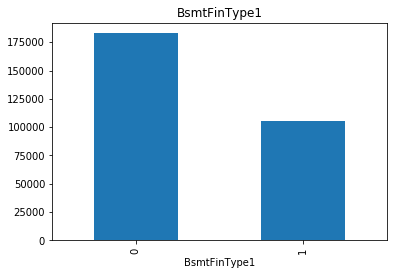

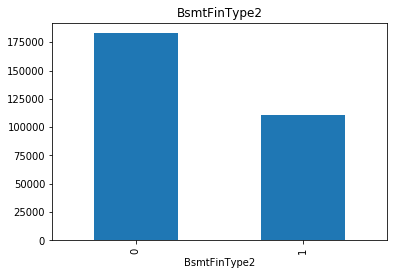

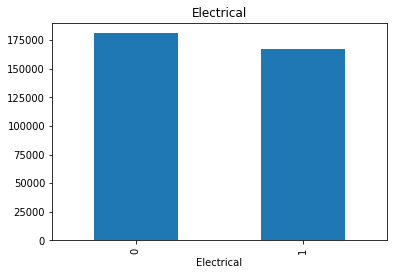

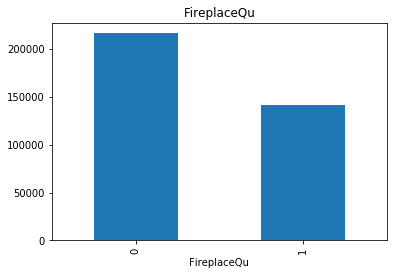

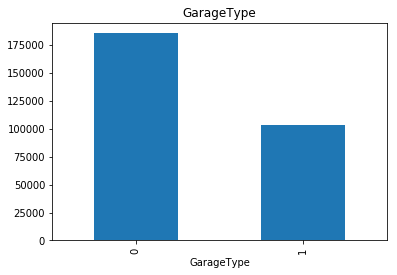

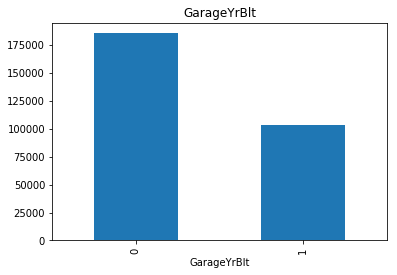

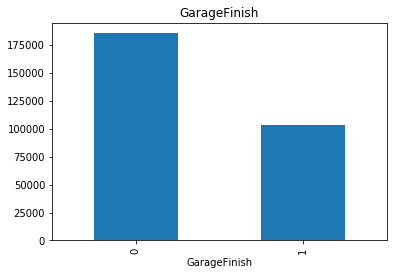

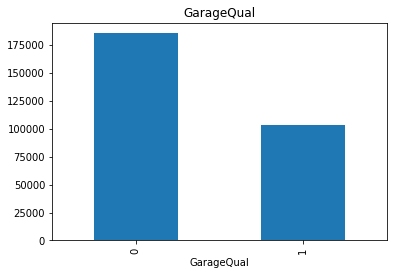

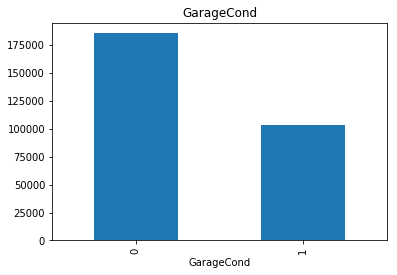

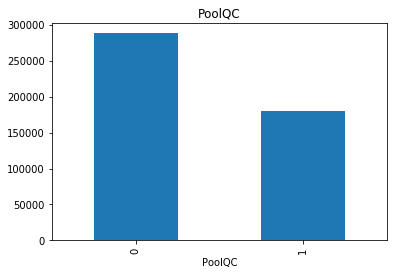

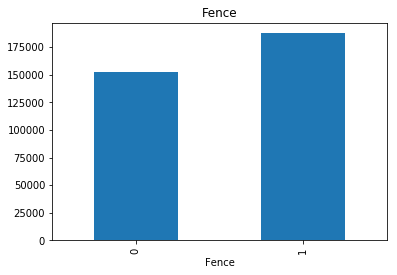

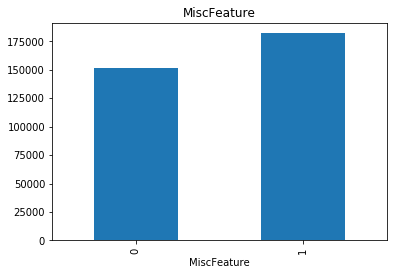

In [4]:
def analyse_na_var(df, var):
    df = df.copy()
    
    df[var] = np.where(df[var].isnull(), 1, 0)
    cmd = df.groupby(var)['SalePrice'].mean().plot.bar()
    
    plt.title(var)
    plt.show()

for var in list_var_na:
    analyse_na_var(data, var)

The average Sale Price in houses where the information is missing, differs from the average Sale Price in houses where information exists.

### numerical variables

In [5]:
num_vars = [col for col in data.columns if data[col].dtype != 'O' ]

print('Number of numerical variables is %i' % len(num_vars))

data[num_vars].head()

Number of numerical variables is 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


The column Id represents an unique identifier for each rows. We will get rid of it later, as this variable brings useless information.

In [6]:
print("Number of unique Ids in our data : " , len(data.Id.unique()))
print("Number of rows in data : ", data.shape[0])

Number of unique Ids in our data :  1460
Number of rows in data :  1460


In [7]:
years_var = [col for col in num_vars if 'Year' in col or 'Yr' in col ]

#### Temporal variables

Now we notice a couple of temporal variables among the numerical ones. Especially 4 years variables.

In [8]:
for years in years_var:
    print(years , data[years].unique(), "\n")

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2

While plotting the evolution of houses sale price with the year in which they were sold, we notice that the price seems to decrease, which is unusual, as it tends to go up in real life.

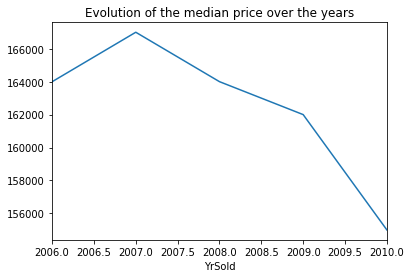

In [9]:
data.groupby('YrSold')["SalePrice"].median().plot()
plt.title("Evolution of the median price over the years")
plt.show()

Let's explore whether there is a relationship between the year variables and the price. We will thus capture the elapsed years between the Year variables and the year in which the house was sold:

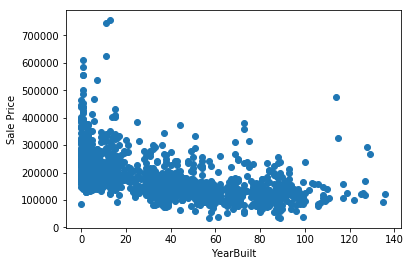

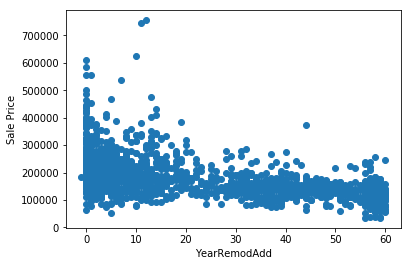

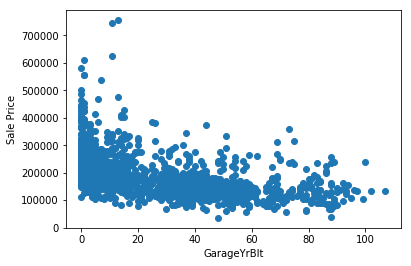

In [10]:
def analyse_years(df, col):
    df = df.copy()

    df[col] = df['YrSold'] - df[col]

    
    plt.scatter(df[col], df['SalePrice'])
    plt.xlabel(col)
    plt.ylabel("Sale Price")
    
    plt.show()
    
for col in years_var:
    if col != 'YrSold':
        analyse_years(data, col)


We see this time that there is clearly a relationship between the variables and the target : The longer the time between the sale date and the house was built or remodled, the lower the price, which makes sense as the house might have an older look or will need repairs

### discrete variables

Let's take a look at the discrete variables now, with a finite number of values.

In [11]:
list_discrete_vars = [col for col in num_vars 
                      if len(data[col].unique()) < 20 and col not in years_var + ["Id"]]

print("Number of discrete variables is " ,len(list_discrete_vars))

data[list_discrete_vars].head()

Number of discrete variables is  14


,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


This variables seem to correponds to qualitative informations related to the houses, such as the number of bedrooms, the presence or not of a fireplace, pool size etc.

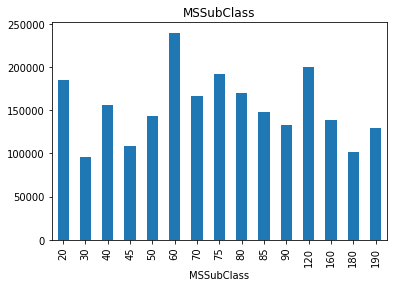

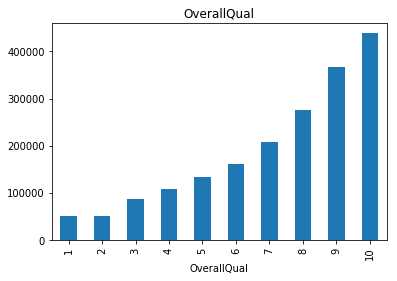

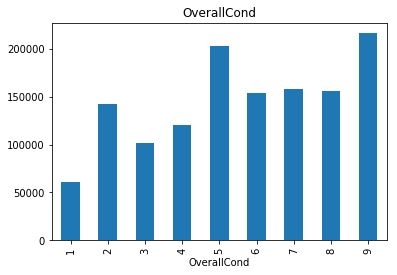

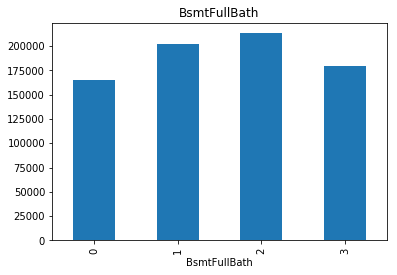

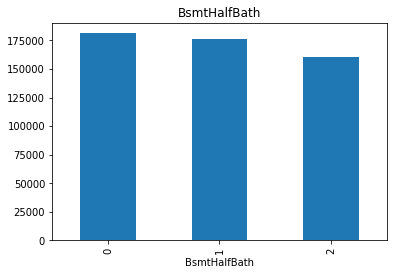

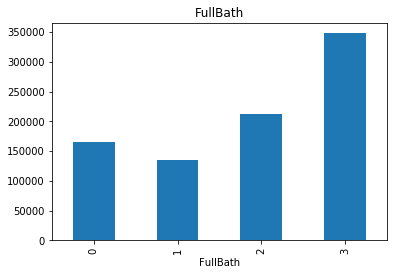

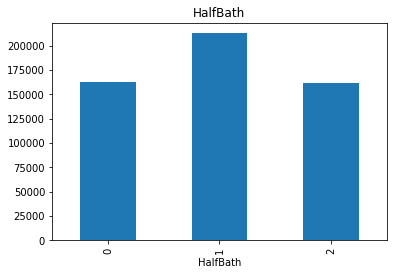

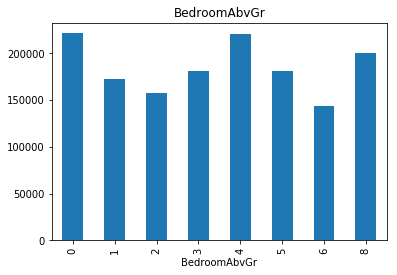

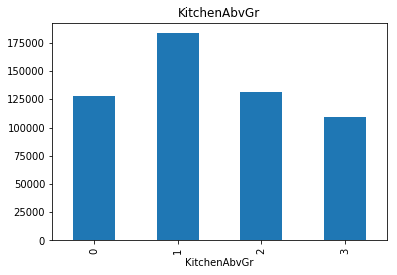

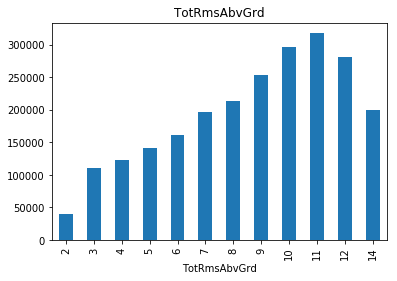

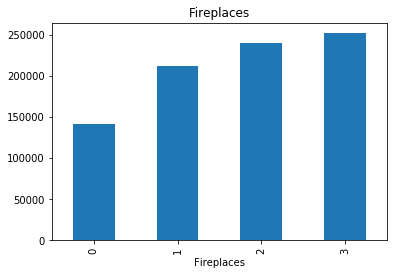

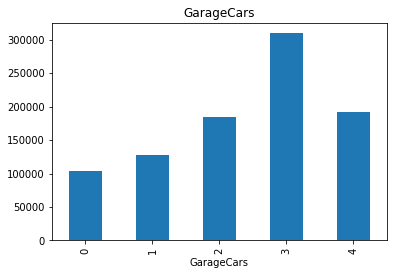

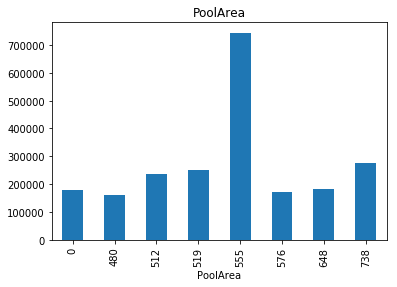

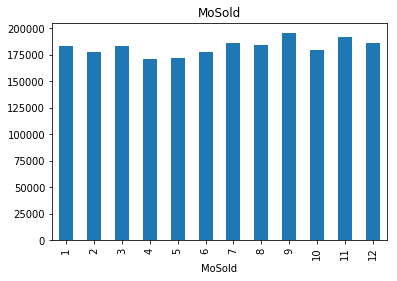

In [12]:
def analyse_discrete(df, var):
    df = df.copy()
    
    df.groupby(var)['SalePrice'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for col in list_discrete_vars:
    analyse_discrete(data, col)

There seem to be a relationship between the variables, however, the relationship is not always monotonic as we could think.
For example, for OverallQual, there is a monotonic relationship: the higher the quality, the higher the SalePrice.
In the other hand, OverallCond grades, like 5, correlate with higher sale prices, but higher values do not necessarily do so. We need to be careful on how we engineer these variables to extract maximum value for a linear model.

### continuous variables

In [13]:
list_cont_vars = [col for col in num_vars if col not in years_var + ['Id'] + list_discrete_vars]
print("Number of continuous variables is " ,len(list_cont_vars))

data[list_cont_vars].head()

Number of continuous variables is  19


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


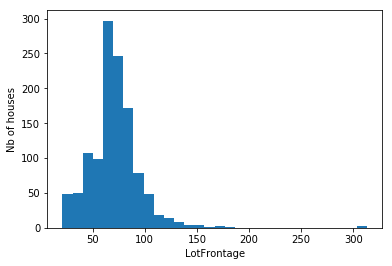

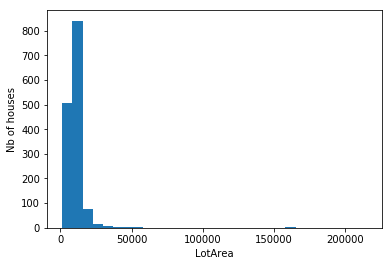

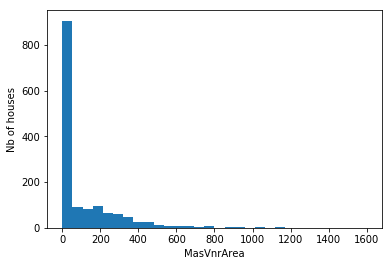

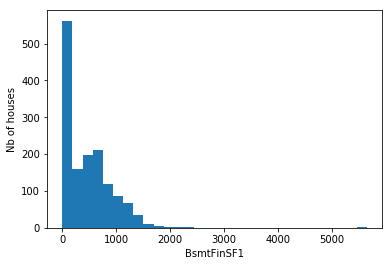

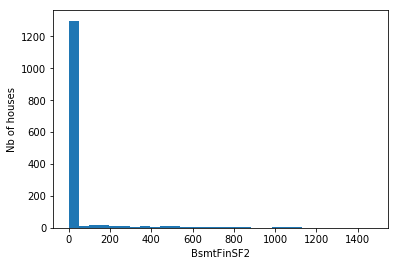

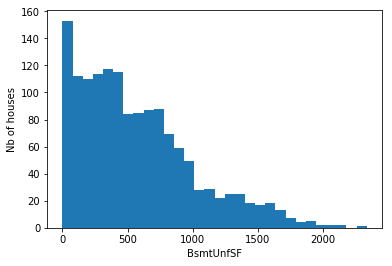

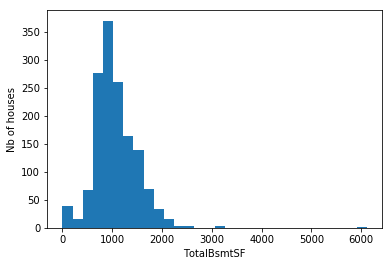

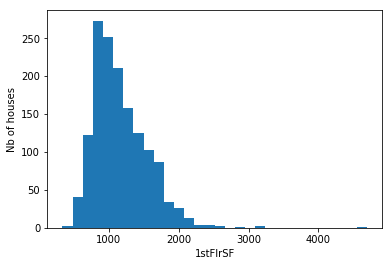

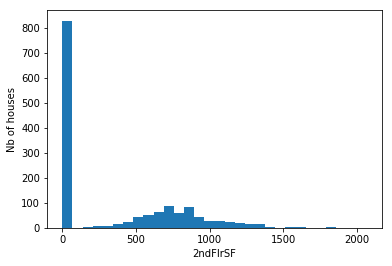

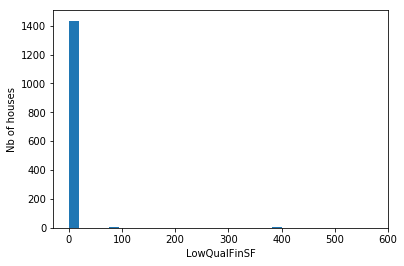

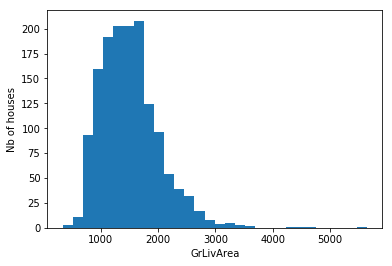

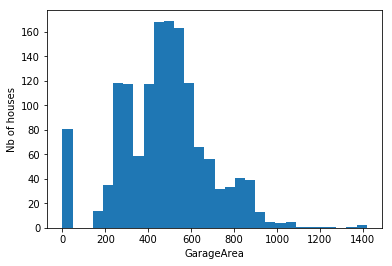

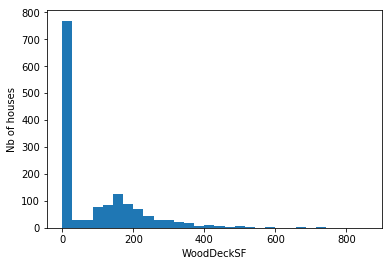

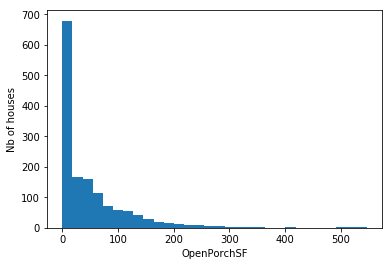

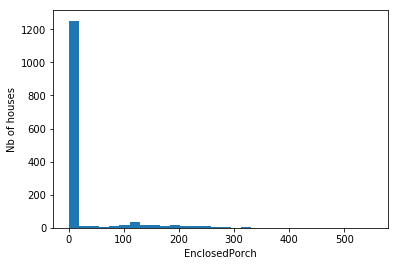

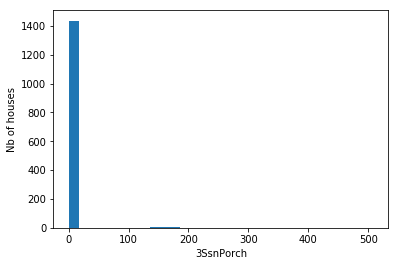

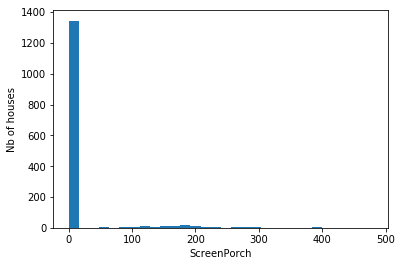

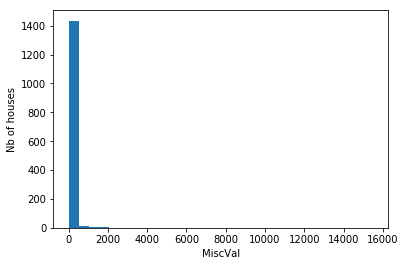

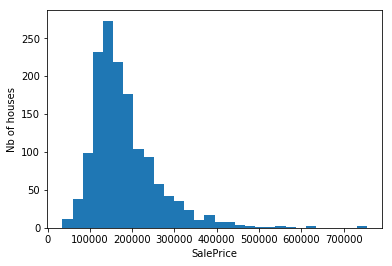

In [14]:
def analyse_cont(df, var):
    df = df.copy()
    
    df[var].hist(bins=30)
    plt.grid()
    plt.xlabel(var)
    plt.ylabel("Nb of houses")
 
    plt.show()
    
for var in list_cont_vars:
    analyse_cont(data, var)

The variables are not normally distributed, including the target variable 'SalePrice'. Let's try to plot these data after a log-transformation.

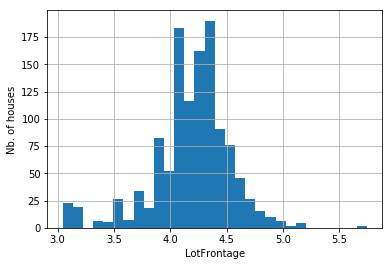

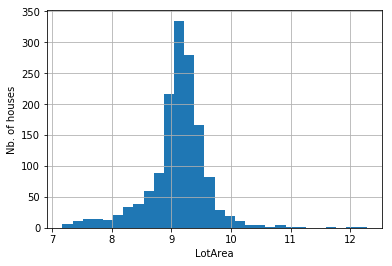

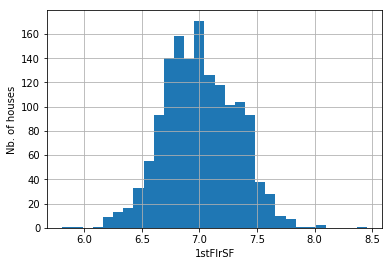

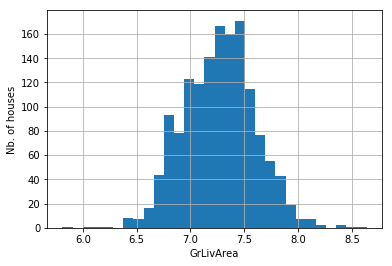

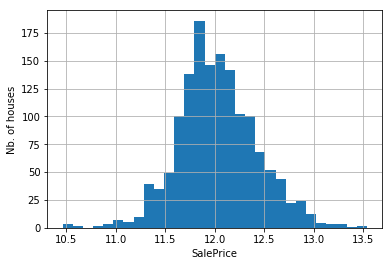

In [15]:
def analyse_cont_log_tr(df, var):
    df = df.copy()
    
    if any(df[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
        df[var].hist(bins=30)
        plt.xlabel(var)
        plt.ylabel("Nb. of houses")
        
        plt.show()

    
for var in list_cont_vars:
    analyse_cont_log_tr(data, var)

Using the log-transformation we get a better spread of the values for most variables.
Next, let's explore the relationship between the continuous variables and the target.

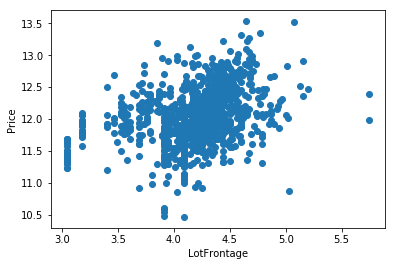

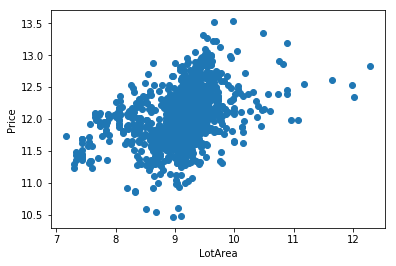

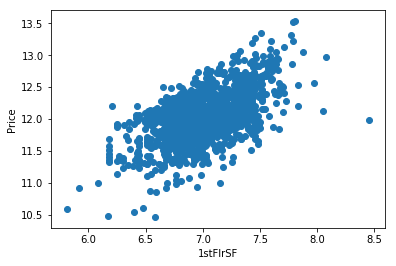

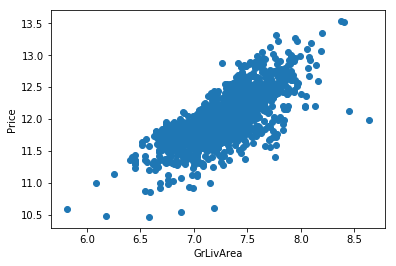

In [16]:
def transformed_target(df, var):
    df = df.copy()
    
    if any(df[var] <= 0):
        pass
    else:
        
        df[var] = np.log(df[var])
        df['SalePrice'] = np.log(df["SalePrice"])

        plt.scatter(df[var], df['SalePrice'])
        plt.xlabel(var)
        plt.ylabel("Price")
        plt.show()
        
for var in list_cont_vars:
    if var != "SalePrice":
        transformed_target(data, var)

This plots demonstrates a monotonic association between the continuous variables and the house prices.
Now let's handle the case of outliers.

### outliers

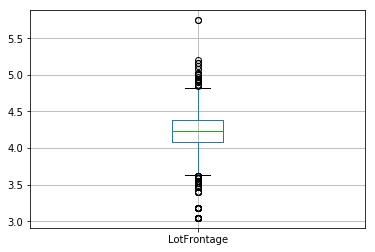

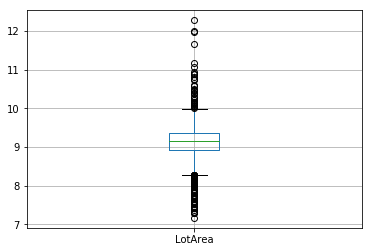

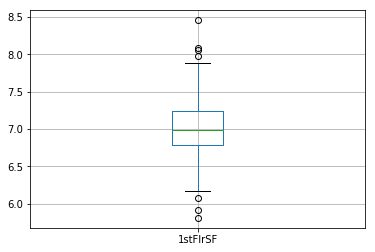

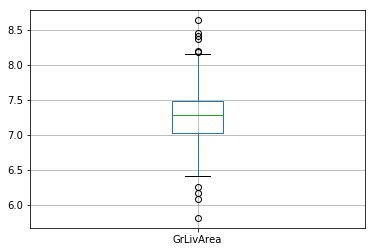

In [17]:
def find_outliers(df, var):
    df = df.copy()
    
    if any(data[var] <= 0):
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        
        plt.show()
        
for var in list_cont_vars:
    if var != "SalePrice":
        find_outliers(data, var)

Most of the continuous variables seem to contain outliers. Outliers tend to affect the performance of linear model. We will spend some time understanding if removing outliers will add performance value to our final machine learning model later.

### categorical variables

In [18]:
list_cat_var = [col for col in data.columns if data[col].dtype == 'O']

print("Number of categorical variables is %i" % len(list_cat_var))

data[list_cat_var].head()

Number of categorical variables is 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [19]:
data[list_cat_var].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

Globally, the categorical variables show low cardinality. Let's dig deeper and find out if there are some rare labels

#### rare labels

In [20]:
def get_rare_labels(df, var, tolerance):
    df = df.copy()
    
    tmp = df.groupby(var)["SalePrice"].count() / len(df)
    
    return tmp[tmp < tolerance]
    

for var in list_cat_var:
    print(get_rare_labels(data, var, 0.01))
    print("\n")

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64


Street
Grvl    0.00411
Name: SalePrice, dtype: float64


Series([], Name: SalePrice, dtype: float64)


LotShape
IR3    0.006849
Name: SalePrice, dtype: float64


Series([], Name: SalePrice, dtype: float64)


Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64


LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64


LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64


Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64


Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64


Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64


Series([], Name: SalePrice, dtype: float64)


HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64


R

Some of the categorical variables show mutiple label present with less than 1 %. We will engineer these variables later, as that label that are under-reprensented tend to cause over-fitting in machine learning models.

Now let's explore the relationship between the target and categorical variables.

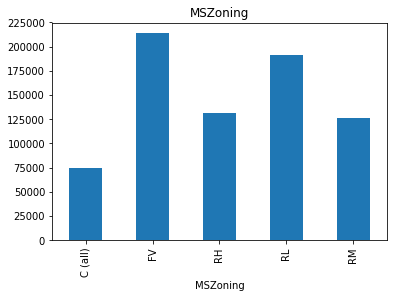

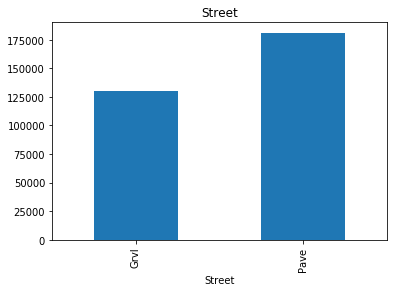

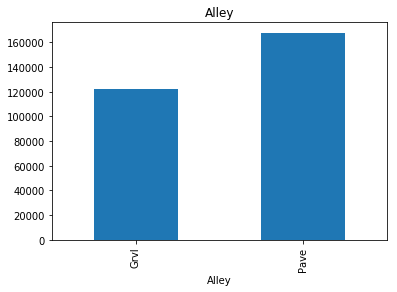

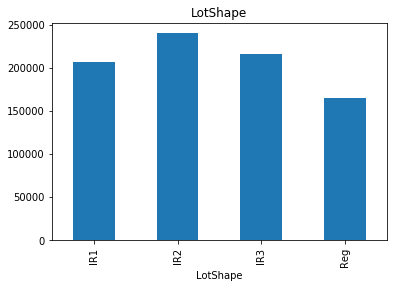

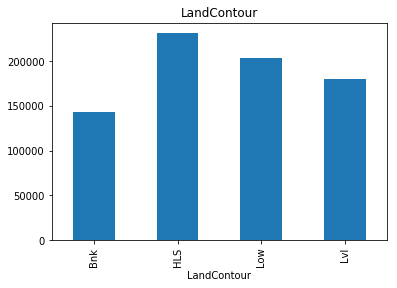

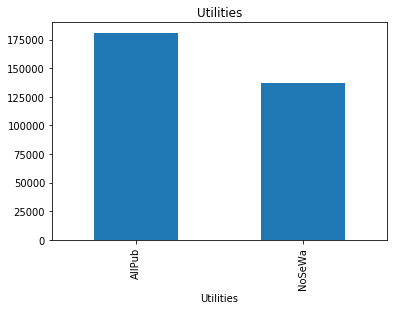

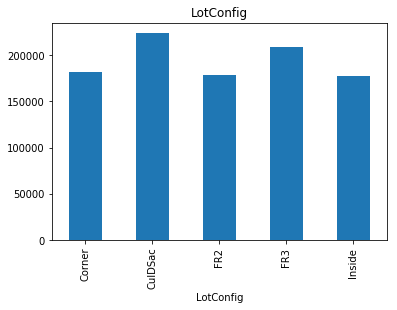

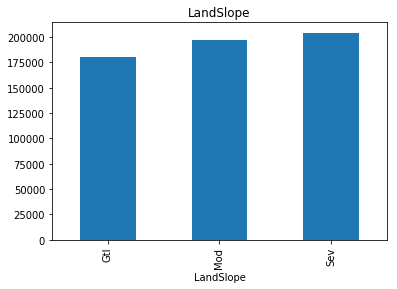

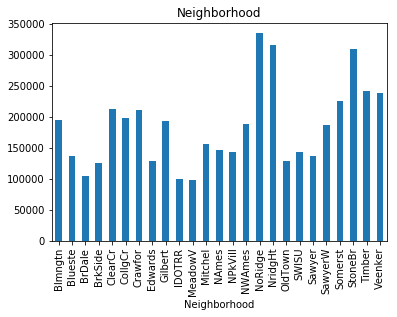

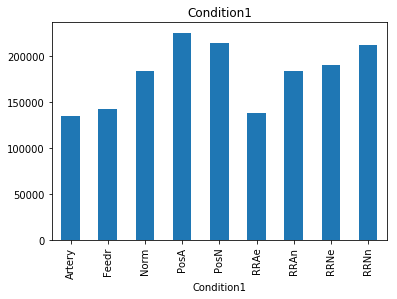

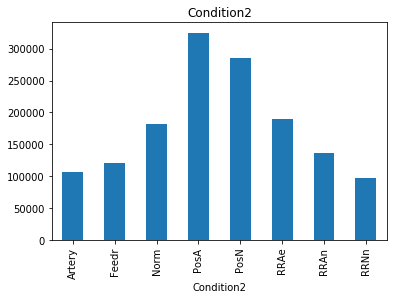

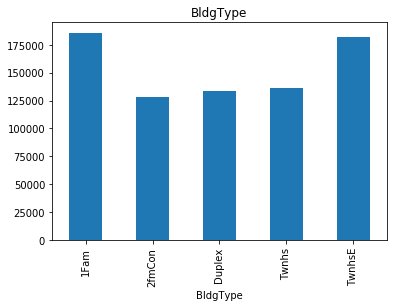

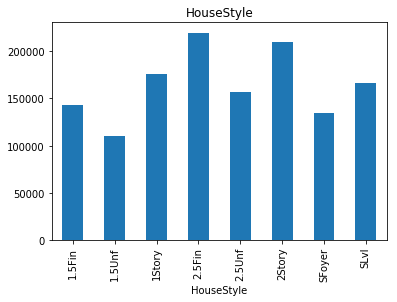

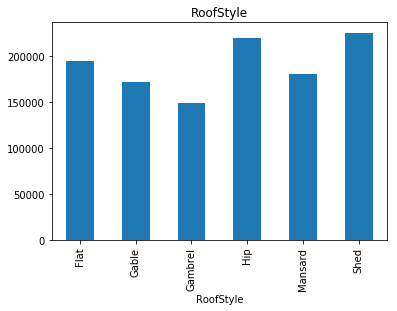

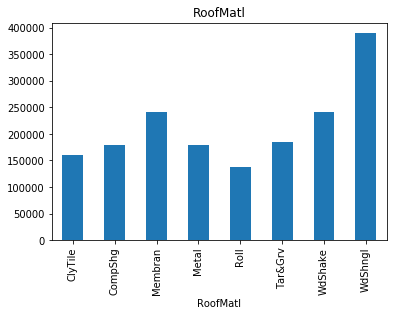

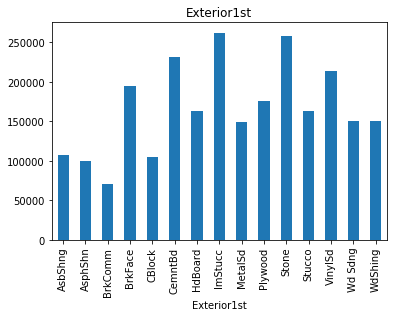

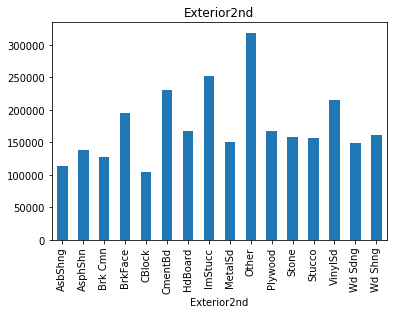

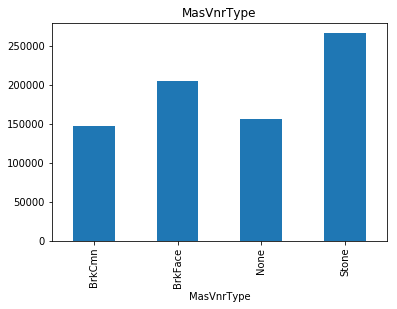

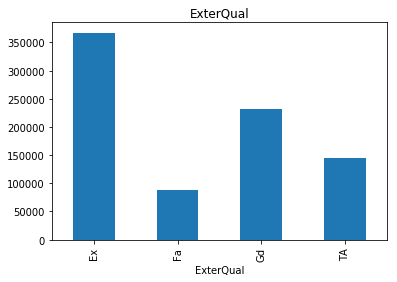

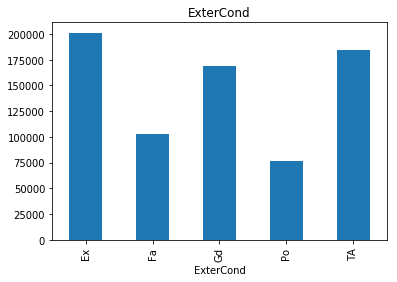

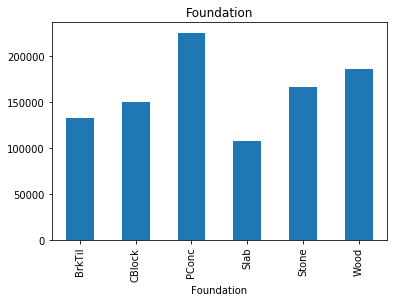

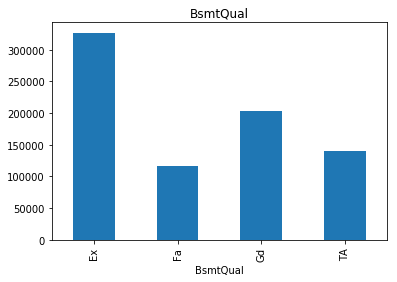

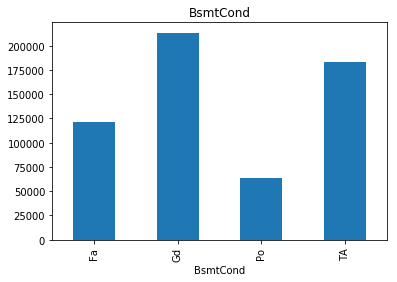

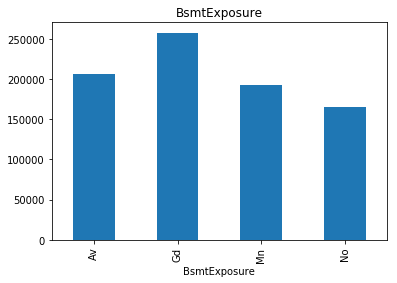

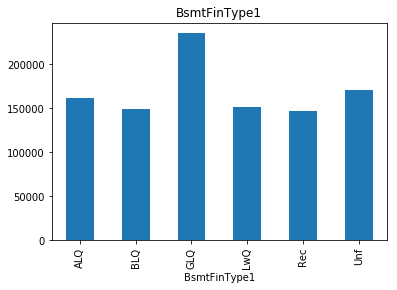

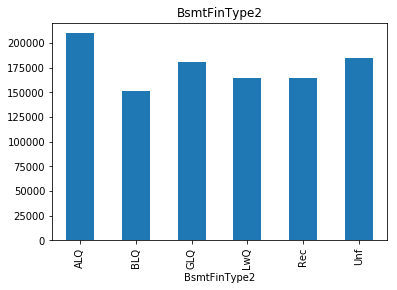

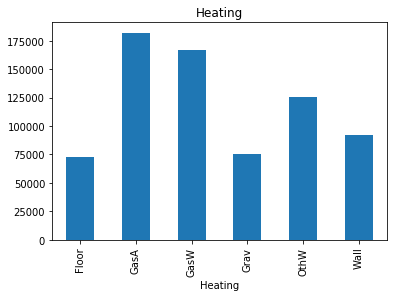

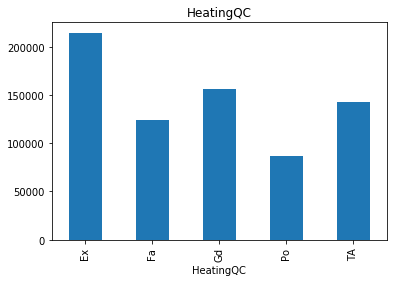

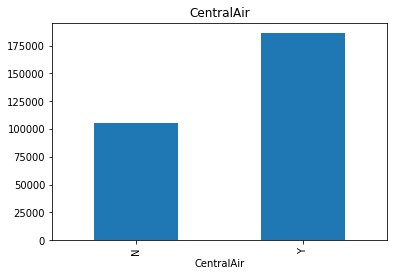

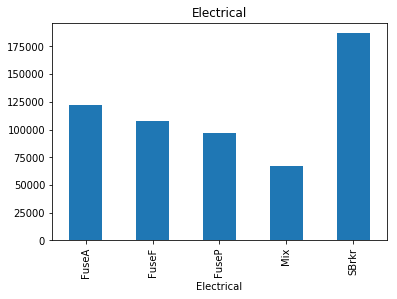

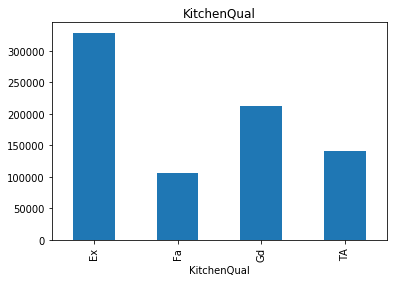

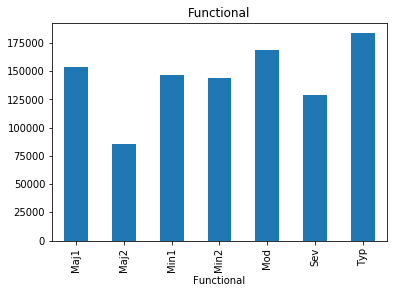

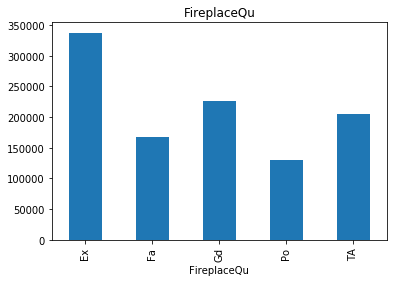

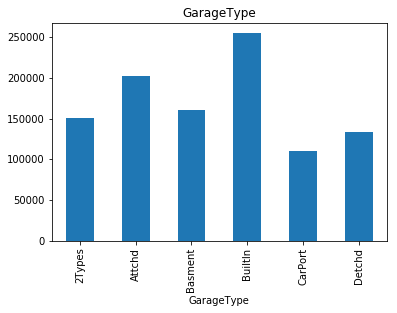

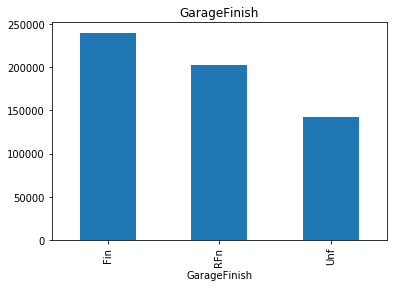

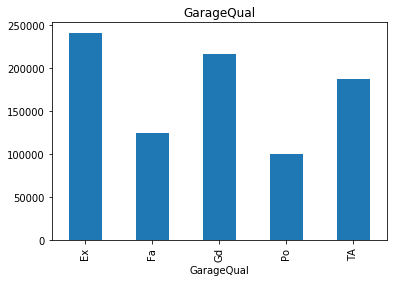

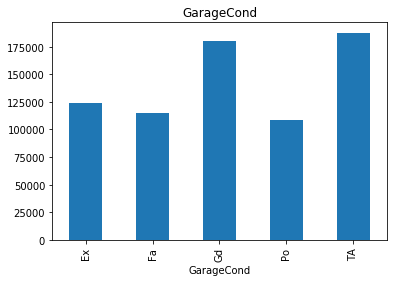

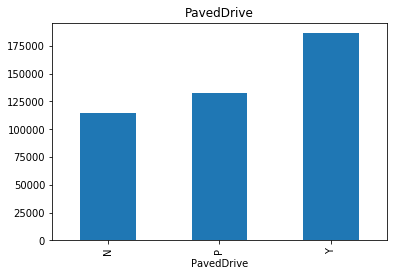

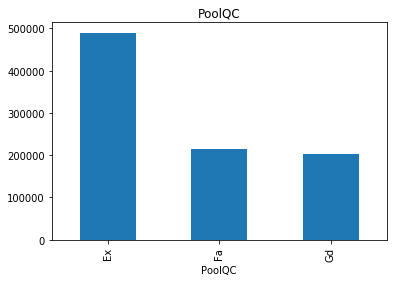

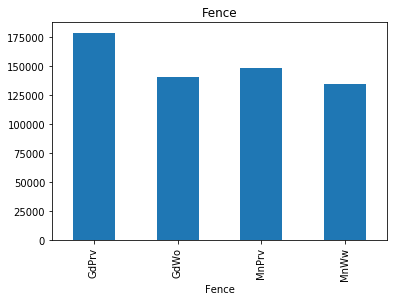

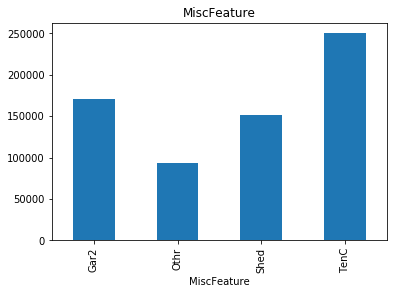

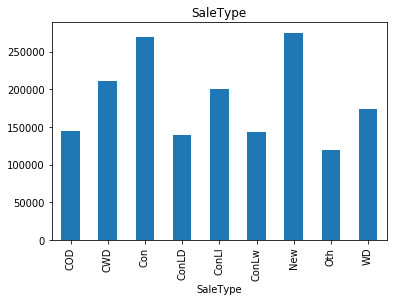

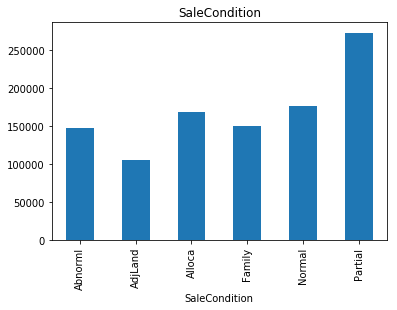

In [21]:
for var in list_cat_var:
    analyse_discrete(data,var)

Clearly, the categories give information on the SalePrice, as different categories show different median sale prices.